# 특성 공학과 규제
## 목표
1. 조금 남아있는 과소 적합 해결
2. 특성 공학과 규제에 대한 이해

저번 시간에 이어, 과소적합을 해결하기 위해 특성 공학과 규제에 대해 알아보겠습니다.

먼저 특성 공학에 대해서 설명하겠습니다.

특성이란 말그대로, 예측하거나 훈련을 위한 데이터의 특성을 뜻합니다.

가지고 있는 데이터가 가지고 있는 이러한 특성을 이용하여 새로운 특성을 만들거나 기존 데이터의 특성을 변환하여 **의미 있는** 특성을 얻어내는 것이 그 목표입니다.

이번에는 길이만 특성으로 사용했던 저번과 달리 여러 특성을 이용하기 위해 데이터를 CSV 파일로 불러와 사용하겠습니다.
이 과정에서 pandas 라이브러리를 이용합니다.

In [111]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

길이를 제외하고도, 2가지 특성이 추가되었습니다.
농어의 높이와 부피를 특성으로 추가합니다.
또한, 무게는 전과 같이 raw 데이터로 추가합니다.

In [112]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

그 후, 모델을 훈련하기 위해 훈련 데이터와 테스트 데이터로 나눕니다

In [113]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

여기까지는 이전과 크게 다름이 없어보입니다.

이번에는 특성 공학을 위해, scikit-learn에서 제공하는 변환기를 사용해보겠습니다.

이러한 변환기는 특성을 조합하여, 새로운 특성을 얻어냅니다.

In [114]:
from sklearn.preprocessing import PolynomialFeatures
# 사이킷런에서 제공하는 특성을 조합하여 새로운 특성을 얻어내는 클래스를 import

poly = PolynomialFeatures()
# 변환기 정의

실제 농어 데이터를 처리하기 전에, 변환기에 대해 알아보기 위해 임의의 데이터를 넣어보겠습니다

In [115]:
test_array = [[2, 3]]
print(test_array)

[[2, 3]]


In [116]:
poly.fit(test_array)
print(poly.transform(test_array))

[[1. 2. 3. 4. 6. 9.]]


[[2, 3]] 배열이 [[1. 2. 3. 4. 6. 9.]]로 나타났습니다.

이러한 결과가 나온 이유는

fit()과 transform() 메소드로 인해 발생했습니다.

fit() 메소드는 새롭게 만들 특성 조합을 찾는 메소드로 변환기 역할을 합니다.
이 동작은 단지 **조합**을 찾는 것이기 때문에, target이 필요하지 않습니다.

transform() 메소드는 실제로 변환을 담당하는 역할로, target을 필요로 합니다.

그렇다면, fit() 메소드가 어떤 방식으로 새로운 조합을 찾았는지 알 수 있는 방법은 무엇일까요?

그 전에, 한 번 생각을 해봅시다.


먼저, 2와 3이 그대로 특성에 입력되었습니다.

새로운 특성을 만들기 위해, 기존 특성을 버릴 이유가 없기 때문입니다.

두 번째로는 두 수를 곱한 값 (6)이 들어왔습니다.

세 번째로는 두 수의 각 제곱(4, 9)이 들어왔습니다.

마지막으로 1이 추가되었습니다. 각 수에 0승을 한 값이라 생각해도 될까요?

하지만, 이런 생각을 항상 할 수 없습니다.

그렇기에 왜 이런 특성이 나왔는지에 대해 알려주는 메소드가 존재합니다.



In [117]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

위와 같이, PolynomialFeatures 모듈은 새로운 특성을 조합하여, 생성해줍니다.

확인해보니, 1은 임의로 추가가 됬습니다.

이유는 선형 방정식에서 절편을 항상 값이 1인 특성과 곱해지는 계수를 추가하기 때문입니다.

하지만, 사이킷런의 선형 모델은 자동으로 절편을 추가하기 때문에 굳이 특성을 만들지 않고

properties에 include_bias = False 추가합니다

학습이 끝났으니 실습으로 넘어가보겠습니다.

In [118]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

# 학습 및 특성 공학

In [119]:
print(train_poly.shape)
# 42개의 샘플과 9개의 특성이 만들어짐

(42, 9)


이번에는 9개의 특성이 생성됬습니다.

위와 같이 이번에도 특성의 조합을 확인해보겠습니다.

In [120]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

1. 특성 자체
2. 특성끼리 곱한 값
3. 특성 자체의 제곱

의 조합으로 특성이 생성되었습니다.

테스트 데이터도 같은 방식으로 변환 후, 선형 회귀를 통한 학습을 진행해보겠습니다.

In [121]:
test_poly = poly.transform(test_input)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(f'train score: {lr.score(train_poly, train_target):.5f}')
print(f'test score: {lr.score(test_poly, test_target):.5f}')

train score: 0.99032
test score: 0.97146


훈련 데이터는 0.99
테스트 데이터는 0.97

로 굉장히 높은 점수가 나왔습니다.
길이뿐만 아니라 높이, 두께를 모두 사용했을 뿐더러 다항 특성을 추가했기 때문입니다.

테스트 데이터의 점수는 크게 높아지지 않았지만 과소 적합을 해결했기에 충분히 유의미한 결과입니다.

그렇다면 이러한 생각이 들 수 있습니다

'제곱만 사용했을 경우에도 높은 점수가 나왔는데, 세제곱이나 더욱 높은 차수의 다른 특성을 추가한다면 어떨까?'

이러한 생각을 해결하기 위해, PolynomialFeatures 모듈은 degree 매개변수를 이용해, 차수의 최대치를 지정할 수 있습니다

반대로 생각해보면 degree는 입력하지 않았을 경우 기본값이 2라고 생각할 수 있습니다.

In [122]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


특성이 55개나 나왔습니다.

단순하게 차수만 추가해서 3*5가 추가된게 아닌, 차수곱끼리도 곱한 값이 추가된 모양입니다.

이번에도 한 번 특성 조합을 확인해보겠습니다.

In [123]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

많은 조합이 추가되었네요 ...
그렇다면 과연 점수는 어떻게 나올까요?

In [124]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(f'train score: {lr.score(train_poly, train_target)}')
print(f'test score: {lr.score(test_poly, test_target)}')

train score: 0.9999999999997232
test score: -144.40564483377855


훈련 데이터는 1이라 봐도 될 정도로 나왔고

테스트 데이터는 -144로 아주 낮은 수치를 보입니다.

이러한 일이 생기는 이유는 선형 모델의 특징에 있습니다.

선형 모델은 특성의 개수가 많아지면, 훈련 데이터 거의 완벽하게 학습을 하는 과대적합이 되어 테스트 데이터에는 맞지 않기 때문입니다.

이런 현상을 해결하기 위해, 규제를 사용해야 합니다.

## 규제(Regularization)

규제에는 여러 방식이 있는데 선형 회귀에서는 특성에 곱해지는 계수의 크기를 작게 만드는 일을 합니다.

또한 규제 방식에 따라 모델의 이름이 바뀌는데

1. 릿지(Ridge): 계수를 제곱한 값을 기준으로 규제 적용 -> L2 정규화로도 불림
2. 라쏘(Lasso): 절댓값을 기준으로 규제 적용 -> L1 정규화로도 불림

등이 있습니다.

하지만, 특성의 크기가 차이가 많이 나고 그 차이로 인해 곱해지는 계수의 값의 차이가 나기 때문에 정규화를 진행해야합니다.

규제를 적용하기 전에, 정규화가 제대로 되는지 알아보겠습니다.

특성의 평균과 분산을 출력합니다.

In [125]:
perch_standard_df = pd.DataFrame(train_poly, columns=poly.get_feature_names_out())
print(f'feature\'s avg:\n{perch_standard_df.mean()}')

feature's avg:
x0              2.844524e+01
x1              8.042381e+00
x2              4.820476e+00
x0^2            8.853150e+02
x0 x1           2.534869e+02
x0 x2           1.519590e+02
x1^2            7.293650e+01
x1 x2           4.369995e+01
x2^2            2.628684e+01
x0^3            2.973261e+04
x0^2 x1         8.598176e+03
x0^2 x2         5.152007e+03
x0 x1^2         2.496800e+03
x0 x1 x2        1.495672e+03
x0 x2^2         8.991845e+02
x1^3            7.279451e+02
x1^2 x2         4.360198e+02
x1 x2^2         2.621151e+02
x2^3            1.581420e+02
x0^4            1.059180e+06
x0^3 x1         3.084295e+05
x0^3 x2         1.846447e+05
x0^2 x1^2       9.012396e+04
x0^2 x1 x2      5.394783e+04
x0^2 x2^2       3.239981e+04
x0 x1^3         2.642247e+04
x0 x1^2 x2      1.581674e+04
x0 x1 x2^2      9.499911e+03
x0 x2^3         5.724890e+03
x1^4            7.771624e+03
x1^3 x2         4.652854e+03
x1^2 x2^2       2.795218e+03
x1 x2^3         1.684947e+03
x2^4            1.019113e+03

In [126]:
print(f'feature\'s var:\n{perch_standard_df.var()}')

feature's var:
x0              7.804156e+01
x1              8.457989e+00
x2              3.124234e+00
x0^2            2.821142e+05
x0 x1           2.649929e+04
x0 x2           9.535302e+03
x1^2            2.511693e+03
x1 x2           9.071307e+02
x2^2            3.361177e+02
x0^3            6.410400e+08
x0^2 x1         5.751069e+07
x0^2 x2         2.048225e+07
x0 x1^2         5.205987e+06
x0 x1 x2        1.858209e+06
x0 x2^2         6.754070e+05
x1^3            4.754425e+05
x1^2 x2         1.702233e+05
x1 x2^2         6.212473e+04
x2^3            2.309928e+04
x0^4            1.258846e+12
x0^3 x1         1.103746e+11
x0^3 x2         3.908930e+10
x0^2 x1^2       9.761174e+09
x0^2 x1 x2      3.458708e+09
x0^2 x2^2       1.243950e+09
x0 x1^3         8.709939e+08
x0 x1^2 x2      3.089868e+08
x0 x1 x2^2      1.113806e+08
x0 x2^3         4.077717e+07
x1^4            7.844063e+07
x1^3 x2         2.788038e+07
x1^2 x2^2       1.008090e+07
x1 x2^3         3.706822e+06
x2^4            1.385843e+06

각각 굉장히 큰 수가 나옵니다.

정규화 규제를 적용하고 다시 확인해보겠습니다.

In [127]:
from sklearn.preprocessing import StandardScaler
# 정규화 모듈 import

ss = StandardScaler()
# 정규화 객체 정의

ss.fit(train_poly)
# 학습

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [128]:
perch_standard_df = pd.DataFrame(train_scaled, columns=poly.get_feature_names_out())
print(f'feature\'s avg:\n{perch_standard_df.mean()}')

feature's avg:
x0             -1.321694e-16
x1              5.286776e-18
x2              4.414458e-16
x0^2            6.872809e-17
x0 x1           4.255855e-16
x0 x2           2.352615e-16
x1^2           -1.215959e-16
x1 x2           1.850372e-16
x2^2           -2.273314e-16
x0^3           -1.440647e-16
x0^2 x1        -6.344132e-17
x0^2 x2        -1.057355e-16
x0 x1^2        -2.088277e-16
x0 x1 x2        1.586033e-17
x0 x2^2        -5.551115e-17
x1^3           -2.379049e-17
x1^2 x2         1.004487e-16
x1 x2^2        -8.987520e-17
x2^3            1.057355e-17
x0^4            2.379049e-17
x0^3 x1        -1.625684e-16
x0^3 x2        -2.775558e-16
x0^2 x1^2       2.511219e-17
x0^2 x1 x2      8.194503e-17
x0^2 x2^2       5.551115e-17
x0 x1^3         2.008975e-16
x0 x1^2 x2     -9.516197e-17
x0 x1 x2^2      1.744636e-16
x0 x2^3         8.194503e-17
x1^4           -8.987520e-17
x1^3 x2         5.286776e-18
x1^2 x2^2      -4.758099e-17
x1 x2^3         5.022437e-17
x2^4            2.801991e-16

In [129]:
print(f'feature\'s var:\n{perch_standard_df.var()}')

feature's var:
x0              1.02439
x1              1.02439
x2              1.02439
x0^2            1.02439
x0 x1           1.02439
x0 x2           1.02439
x1^2            1.02439
x1 x2           1.02439
x2^2            1.02439
x0^3            1.02439
x0^2 x1         1.02439
x0^2 x2         1.02439
x0 x1^2         1.02439
x0 x1 x2        1.02439
x0 x2^2         1.02439
x1^3            1.02439
x1^2 x2         1.02439
x1 x2^2         1.02439
x2^3            1.02439
x0^4            1.02439
x0^3 x1         1.02439
x0^3 x2         1.02439
x0^2 x1^2       1.02439
x0^2 x1 x2      1.02439
x0^2 x2^2       1.02439
x0 x1^3         1.02439
x0 x1^2 x2      1.02439
x0 x1 x2^2      1.02439
x0 x2^3         1.02439
x1^4            1.02439
x1^3 x2         1.02439
x1^2 x2^2       1.02439
x1 x2^3         1.02439
x2^4            1.02439
x0^5            1.02439
x0^4 x1         1.02439
x0^4 x2         1.02439
x0^3 x1^2       1.02439
x0^3 x1 x2      1.02439
x0^3 x2^2       1.02439
x0^2 x1^3       1.02439
x

정규화가 잘 된 모습입니다.

이제 규제를 적용해보겠습니다.

## 릿지

위에서 설명한대로, 릿지 모델은 계수를 제곱한 값을 기준으로 규제를 적용합니다.

In [130]:
# 릿지 회귀 학습
from sklearn. linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(f'train score: {ridge.score(train_scaled, train_target)}')
print(f'test score: {ridge.score(test_scaled, test_target)}')

train score: 0.9896101671037343
test score: 0.9790693977615387


규제를 적용하자, 훈련 점수는 낮아졌지만, 평가 점수가 정상으로 돌아왔습니다.

많은 특성을 사용했음에도 규제를 통하여 과대적합을 해결한 것입니다.

이때, 릿지뿐만 아니라 라쏘 모델을 사용할 때도 alpha 매개변수를 이용해 규제의 강도를 조절할 수 있습니다.

alpha 값이 커지면, 규제를 강하게 하는 것이고, 이는 계수의 값을 더 줄여 과소적합을 유도하는 것입니다.

그래프를 떠올린다면, 규제가 강할수록 선형 그래프가 나올 확률이 높습니다.

그래서 이번에는 alpha 값에 따른 점수 변화를 알아보겠습니다.

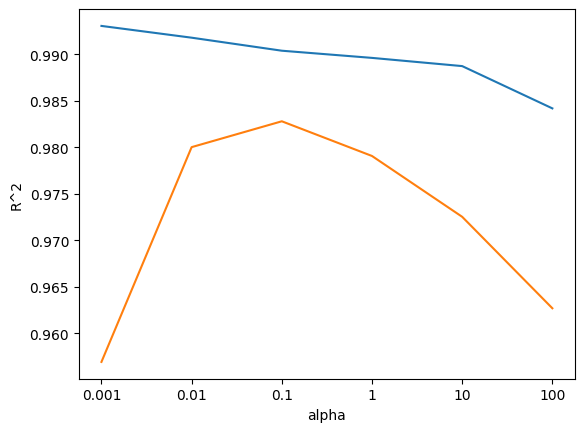

In [131]:
from matplotlib import pyplot as plt

train_score = []
test_score = []
# 점수를 담기 위한 배열

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# alpha 값 배열

for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xticks(np.log10(alpha_list), alpha_list)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha 값의 변화를 보기위해, 10배씩 늘려가며 훈련 한 후, 점수 변화를 보기 위한 그래프입니다.

blue = train
yellow = test

왼쪽은 점수 차이가 아주 큽니다. 이는 과대적합으로 볼 수 있고
오른쪽은 둘 다 점수가 내려가, 과소적합으로 볼 수 있습니다.

그리하여 최종적으로 적절한 alpha 값은 0.1로 볼 수 있습니다.

이를 통해 최종 모델을 훈련하여, 점수를 보면 아래와 같이 나옵니다.

In [132]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(f'train score: {ridge.score(train_scaled, train_target)}')
print(f'test score: {ridge.score(test_scaled, test_target)}')

train score: 0.9896101671037343
test score: 0.9790693977615387


## 라소(Lasso)
두 번째는 라쏘 모델입니다. 릿지 모델과 다르게 제곱이 아닌 절댓값을 기준으로 규제를 적용합니다.

릿지와 같이 alpha를 제외하고 max_iter라는 매개변수가 있습니다.

이는 라쏘 모델이 훈련할 경우, 최적의 계수를 찾기 위해 반복을 하는데 이 값이 충분하지 않다면

제대로 규제가 이뤄지지 않고, 경고를 준다. 이를 해결하기 위해 경고가 뜬다면 max_iter를 설정하여

반복값을 늘려줘야한다. 기본값은 1000이다.

In [147]:
from sklearn.linear_model import Lasso

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
# 그래프로 확인
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xticks(np.log10(alpha_list), alpha_list)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [134]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [135]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
0.9896101671037343

0.9896101671037343


0.9896101671037343

In [136]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [137]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [138]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

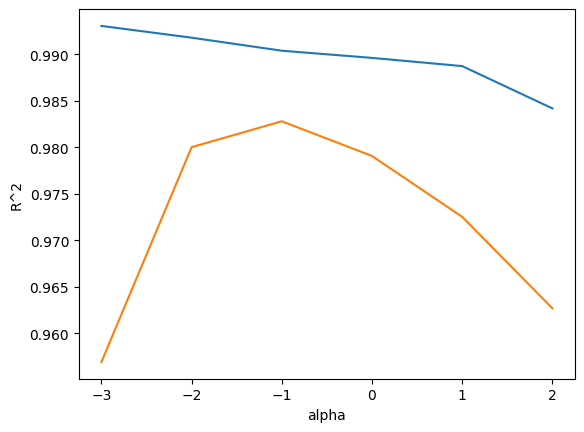

In [139]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [140]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [141]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [142]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [143]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


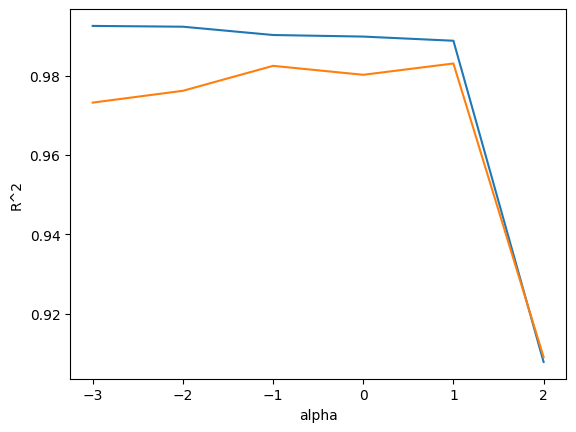

In [144]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [145]:

max_n = 0
max_nn = 0

max_score = 0.01
max_scoree = 100
alpha_list = np.arange(0.01, 1, 0.01)
for i in alpha_list:
  lasso = Lasso(alpha=i)
  lasso.fit(train_scaled, train_target)
  train_score = lasso.score(train_scaled, train_target)
  test_score = lasso.score(test_scaled, test_target)
  print(f"alpha: {i}\ntrain score: {train_score}\ntest score: {test_score}")
  print(f"minus: {train_score - test_score}\n")
  if train_score > max_score:
    max_score = train_score
    max_n = i
  if (train_score-test_score) < max_scoree:
    max_scoree = train_score-test_score
    max_nn = i
print(f"max score -> alpha: {max_n} | score = {max_score}")
print(f"max score -> alpha: {max_nn} | score = {max_scoree}")

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.642e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+04, tolerance: 5.183e+02
  model = cd_fast.enet_

alpha: 0.01
train score: 0.9907921500205304
test score: 0.9836730006301534
minus: 0.007119149390377055

alpha: 0.02
train score: 0.9907194731893983
test score: 0.9835839664319541
minus: 0.007135506757444232

alpha: 0.03
train score: 0.9906460785778021
test score: 0.9834697680661518
minus: 0.007176310511650241

alpha: 0.04
train score: 0.9905850212728826
test score: 0.9834273922424382
minus: 0.007157629030444368

alpha: 0.05
train score: 0.990540916741783
test score: 0.9833067705262081
minus: 0.007234146215574944

alpha: 0.060000000000000005
train score: 0.9904747589022175
test score: 0.9832283563848967
minus: 0.0072464025173207824

alpha: 0.06999999999999999
train score: 0.9903955504862962
test score: 0.9829721282920133
minus: 0.007423422194282936

alpha: 0.08
train score: 0.9903076729524749
test score: 0.9827136355312593
minus: 0.00759403742121556

alpha: 0.09
train score: 0.9902140198066834
test score: 0.9824695485390518
minus: 0.00774447126763167

alpha: 0.09999999999999999
train sc

In [146]:
print(np.sum(lasso.coef_ == 0))
print(lasso.coef_, lasso.intercept_)

42
[ 0.          0.          0.         95.66569434 11.55550878  0.
 10.60133253  0.         31.49200763  0.         22.29340228  0.
 29.07709432  0.          0.         18.51399096  0.          0.
 41.93837253  0.          0.          0.          0.          0.
  0.          5.73954528  0.          0.          0.         20.53853085
  0.          0.          0.          8.90083641  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         35.31799756  0.          0.          0.
  0.         21.36386273  0.          0.          0.          0.
  0.        ] 400.8333333333333
